In [1]:
# Importing all the Libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
!pip install -U imbalanced-learn

  Using cached https://files.pythonhosted.org/packages/e5/4c/7557e1c2e791bd43878f8c82065bddc5798252084f26ef44527c02262af1/imbalanced_learn-0.4.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c1/1c/8fa5aefe23a2fc254e9faadc10a30052c63d92f05fb59127ff0e65e4171c/scikit_learn-0.20.2-cp36-cp36m-win_amd64.whl
  Found existing installation: scikit-learn 0.19.1
    Uninstalling scikit-learn-0.19.1:


Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.19.1-py3.6.egg-info\\dependency_links.txt'
Consider using the `--user` option or check the permissions.

You are using pip version 18.1, however version 19.0.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
# For loading .arff files
from scipy.io import arff
# To perform mean imputation
from sklearn.preprocessing import Imputer
#To perform kFold Cross Validation
from sklearn.model_selection import KFold
# Formatted counter of class labels
from collections import Counter
# Ordered Dictionary
from collections import OrderedDict
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE 
# To analyze the type of missing data
import missingno as msno
# Library for performing k-NN and MICE imputations 
import fancyimpute

# To perform mean imputation
from sklearn.preprocessing import Imputer


C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
# Impoting classification models
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
# Import metrics
import random

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

In [22]:
# Read the data
train = pd.read_csv("data_train.csv")
test = pd.read_csv("data_test.csv")

In [7]:
print(train.shape, test.shape)

(19805, 371) (13203, 370)


In [8]:
print(train.head())
print(train.info())
print(train.describe())

       ID  var3  var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
0   17406     2     23                 0.0                      0.0   
1   94453     2     28                 0.0                      0.0   
2   92577     2     23                 0.0                      0.0   
3  130625     2     46                 0.0                      0.0   
4   97174     4     57                 0.0                      0.0   

   imp_op_var39_comer_ult3  imp_op_var40_comer_ult1  imp_op_var40_comer_ult3  \
0                      0.0                      0.0                      0.0   
1                      0.0                      0.0                      0.0   
2                      0.0                      0.0                      0.0   
3                      0.0                      0.0                      0.0   
4                      0.0                      0.0                      0.0   

   imp_op_var40_efect_ult1  imp_op_var40_efect_ult3   ...    \
0                      0.0   

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19805 entries, 0 to 19804
Columns: 371 entries, ID to TARGET
dtypes: float64(103), int64(268)
memory usage: 56.1 MB


In [10]:
# Removing duplic
train= train.drop_duplicates()

In [11]:
train.shape

(19805, 371)

In [12]:
# Find the Target value distribution
train["TARGET"].value_counts()

0    17997
1     1808
Name: TARGET, dtype: int64

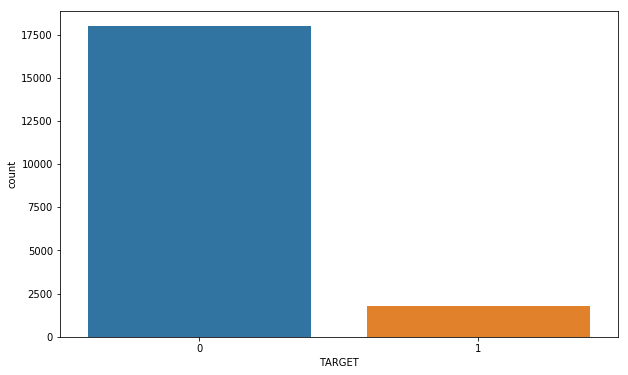

In [13]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='TARGET',data = train)

In [14]:
# Missing 
train.isnull().mean()

ID                               0.0
var3                             0.0
var15                            0.0
imp_ent_var16_ult1               0.0
imp_op_var39_comer_ult1          0.0
imp_op_var39_comer_ult3          0.0
imp_op_var40_comer_ult1          0.0
imp_op_var40_comer_ult3          0.0
imp_op_var40_efect_ult1          0.0
imp_op_var40_efect_ult3          0.0
imp_op_var40_ult1                0.0
imp_op_var41_comer_ult1          0.0
imp_op_var41_comer_ult3          0.0
imp_op_var41_efect_ult1          0.0
imp_op_var41_efect_ult3          0.0
imp_op_var41_ult1                0.0
imp_op_var39_efect_ult1          0.0
imp_op_var39_efect_ult3          0.0
imp_op_var39_ult1                0.0
imp_sal_var16_ult1               0.0
ind_var1_0                       0.0
ind_var1                         0.0
ind_var2_0                       0.0
ind_var2                         0.0
ind_var5_0                       0.0
ind_var5                         0.0
ind_var6_0                       0.0
i

In [15]:
data_preprocessing = train.copy()
data_preprocessing.drop(['TARGET'], axis = 1, inplace = True)

In [16]:
normalized_data = (data_preprocessing - data_preprocessing.mean())/data_preprocessing.std()
normalized_data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,-1.337188,0.033324,-0.808802,-0.054497,-0.209574,-0.2206,-0.040373,-0.045173,-0.021598,-0.022136,...,-0.007106,-0.018851,-0.014935,-0.017387,-0.017771,-0.021267,-0.011617,-0.019362,-0.017408,-0.028397
1,0.425705,0.033324,-0.425700,-0.054497,-0.209574,-0.2206,-0.040373,-0.045173,-0.021598,-0.022136,...,-0.007106,-0.018851,-0.014935,-0.017387,-0.017771,-0.021267,-0.011617,-0.019362,-0.017408,0.021907
2,0.382781,0.033324,-0.808802,-0.054497,-0.209574,-0.2206,-0.040373,-0.045173,-0.021598,-0.022136,...,-0.007106,-0.018851,-0.014935,-0.017387,-0.017771,-0.021267,-0.011617,-0.019362,-0.017408,0.343477
3,1.253347,0.033324,0.953466,-0.054497,-0.209574,-0.2206,-0.040373,-0.045173,-0.021598,-0.022136,...,-0.007106,-0.018851,-0.014935,-0.017387,-0.017771,-0.021267,-0.011617,-0.019362,-0.017408,0.021907
4,0.487963,0.033384,1.796290,-0.054497,-0.209574,-0.2206,-0.040373,-0.045173,-0.021598,-0.022136,...,-0.007106,-0.018851,-0.014935,-0.017387,-0.017771,-0.021267,-0.011617,-0.019362,-0.017408,0.119599


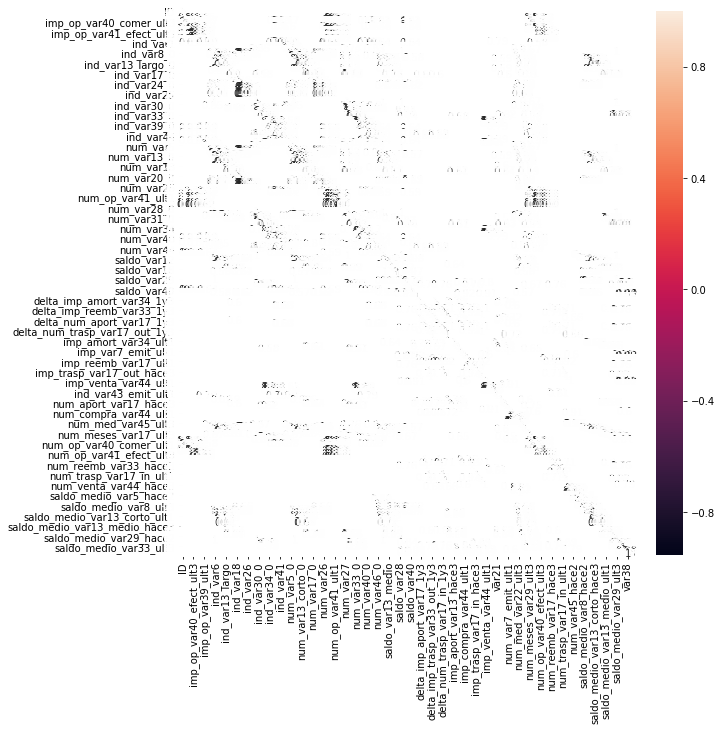

In [22]:
# Check for Correlation among all variables  
corr = normalized_data[normalized_data.columns].corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corr,annot = True, linewidths=0.5, ax=ax)

In [17]:
# Check for Skewness in the dataset 
normalized_data.skew()

ID                                 0.000499
var3                             -29.956036
var15                              1.518771
imp_ent_var16_ult1                47.229142
imp_op_var39_comer_ult1           10.156785
imp_op_var39_comer_ult3            9.648672
imp_op_var40_comer_ult1           49.605484
imp_op_var40_comer_ult3           34.719166
imp_op_var40_efect_ult1           54.147616
imp_op_var40_efect_ult3           57.914874
imp_op_var40_ult1                 45.106694
imp_op_var41_comer_ult1           10.363887
imp_op_var41_comer_ult3            9.744873
imp_op_var41_efect_ult1           41.832151
imp_op_var41_efect_ult3           59.789416
imp_op_var41_ult1                 25.251457
imp_op_var39_efect_ult1           41.171863
imp_op_var39_efect_ult3           59.070643
imp_op_var39_ult1                 24.777782
imp_sal_var16_ult1               101.878212
ind_var1_0                         9.286340
ind_var1                          15.841472
ind_var2_0                      

In [23]:
train_labels = train['TARGET']

In [24]:
train = train.drop(['TARGET','ID'],axis=1)

In [25]:
train.head()


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111616.770000
1,2,28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,153711.960000
3,2,46,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016
4,4,57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128369.460000


In [26]:
from feature_selector import FeatureSelector

In [27]:
#Implementation
#The FeatureSelector has five functions for identifying columns to remove:

#identify_missing
#identify_single_unique
#identify_collinear
#identify_zero_importance
#identify_low_importance

fs = FeatureSelector(data = train, labels = train_labels)

In [28]:
#Missing Values
fs.identify_missing(missing_threshold=0.6)

0 features with greater than 0.60 missing values.



In [29]:
missing_features = fs.ops['missing']
missing_features[:10]

[]

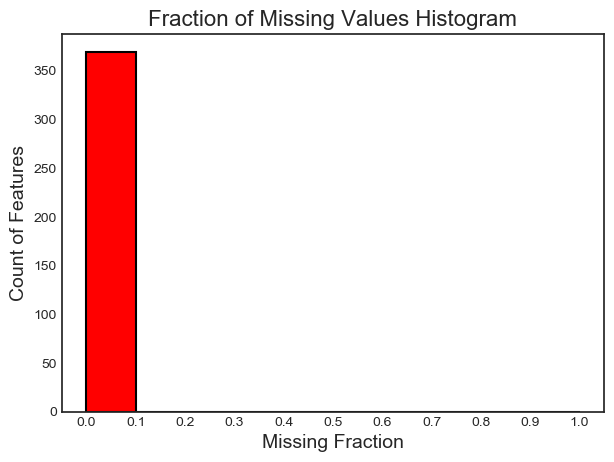

In [30]:
fs.plot_missing()

In [31]:
fs.missing_stats.head(12)

,missing_fraction
var3,0.0
imp_trasp_var17_in_ult1,0.0
ind_var7_emit_ult1,0.0
imp_venta_var44_ult1,0.0
imp_venta_var44_hace3,0.0
imp_trasp_var33_out_ult1,0.0
imp_trasp_var33_out_hace3,0.0
imp_trasp_var33_in_ult1,0.0
imp_trasp_var33_in_hace3,0.0
imp_trasp_var17_out_ult1,0.0


In [32]:
#Finding Single Unique value
fs.identify_single_unique()

67 features with a single unique value.



In [34]:
#Collinear (highly correlated) Features
fs.identify_collinear(correlation_threshold=0.90)

153 features with a correlation magnitude greater than 0.90.



In [35]:
correlated_features = fs.ops['collinear']
correlated_features[:5]

['imp_op_var39_comer_ult3',
 'imp_op_var41_comer_ult1',
 'imp_op_var41_comer_ult3',
 'imp_op_var41_efect_ult3',
 'imp_op_var39_efect_ult1']

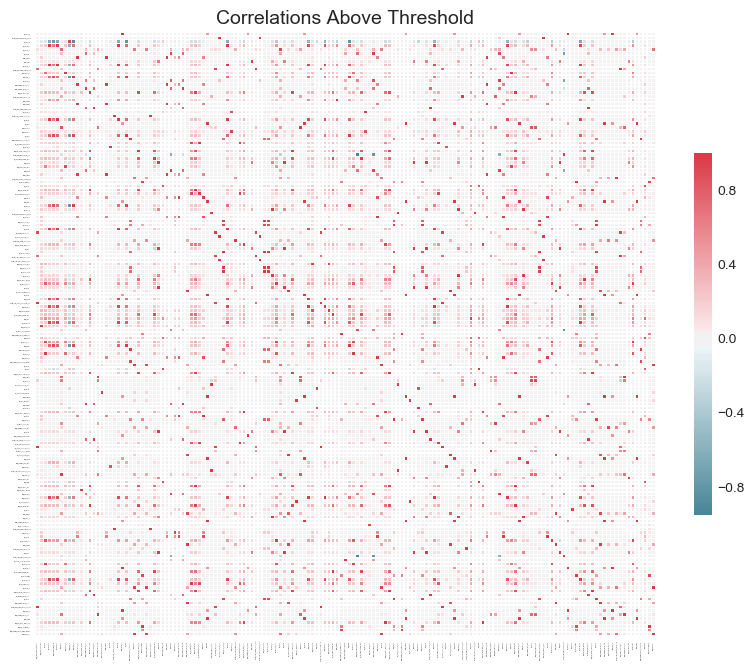

In [36]:
fs.plot_collinear()

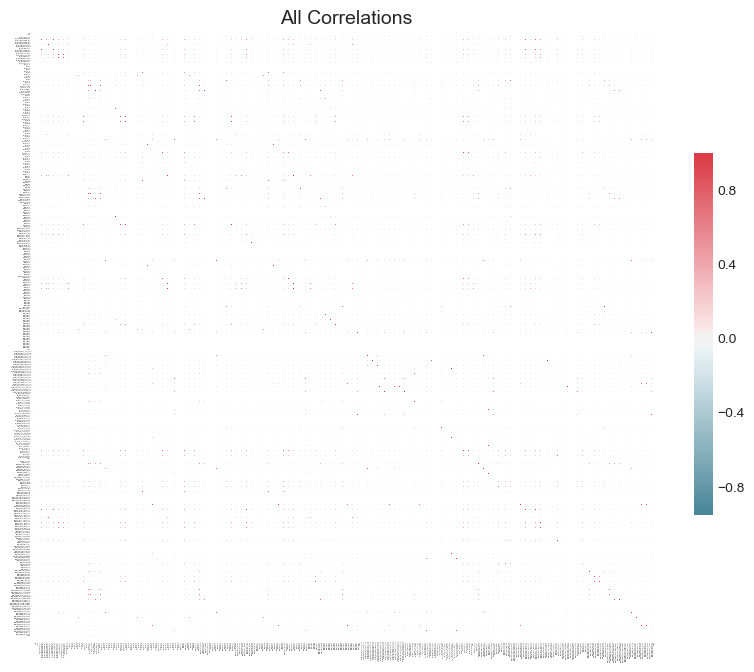

In [37]:
fs.plot_collinear(plot_all=True)

153 features with a correlation magnitude greater than 0.90.



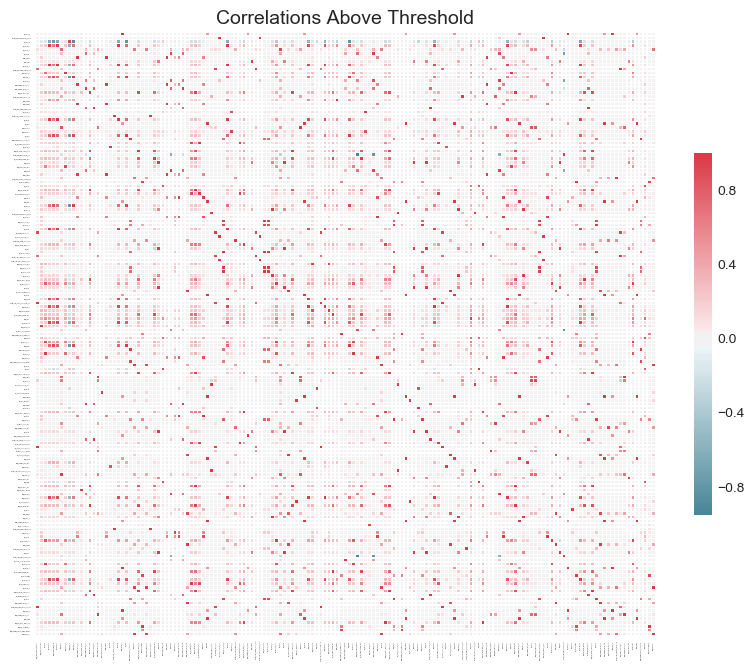

In [38]:
fs.identify_collinear(correlation_threshold=0.90)
fs.plot_collinear()

In [39]:
fs.record_collinear

,drop_feature,corr_feature,corr_value
0,imp_op_var39_comer_ult3,imp_op_var39_comer_ult1,0.910016
1,imp_op_var41_comer_ult1,imp_op_var39_comer_ult1,0.978369
2,imp_op_var41_comer_ult3,imp_op_var39_comer_ult3,0.978059
3,imp_op_var41_comer_ult3,imp_op_var41_comer_ult1,0.907224
4,imp_op_var41_efect_ult3,imp_op_var41_efect_ult1,0.932216
5,imp_op_var39_efect_ult1,imp_op_var41_efect_ult1,0.999118
6,imp_op_var39_efect_ult1,imp_op_var41_efect_ult3,0.930366
7,imp_op_var39_efect_ult3,imp_op_var41_efect_ult1,0.932620
8,imp_op_var39_efect_ult3,imp_op_var41_efect_ult3,0.999384
9,imp_op_var39_efect_ult3,imp_op_var39_efect_ult1,0.932024


In [40]:
#Identifying the Zero Importance Feature
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[78]	valid_0's auc: 0.865659	valid_0's binary_logloss: 0.232302
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[90]	valid_0's auc: 0.883618	valid_0's binary_logloss: 0.215221
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[121]	valid_0's auc: 0.867331	valid_0's binary_logloss: 0.209879
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[96]	valid_0's auc: 0.874552	valid_0's binary_logloss: 0.206289
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[85]	valid_0's auc: 0.870581	valid_0's binary_logloss: 0.207012
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[86]	valid_0's auc: 0.867815	valid_0's binary_logloss: 0.

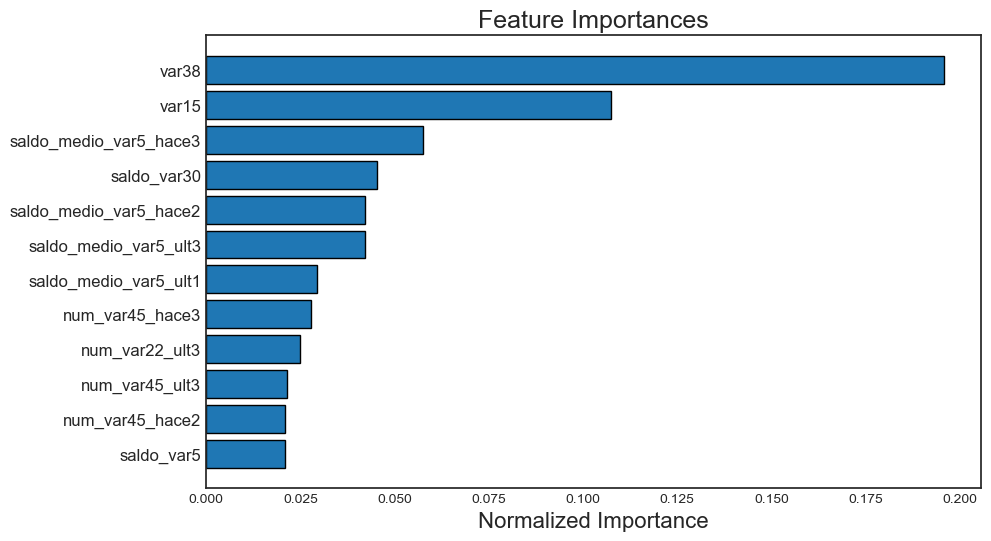

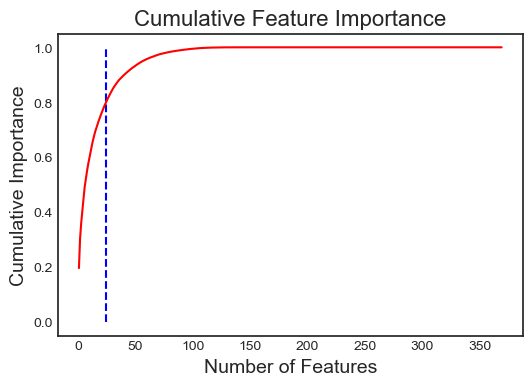

25 features required for 0.80 of cumulative importance


In [41]:
fs.plot_feature_importances(threshold = 0.80, plot_n = 12)

In [42]:
fs.feature_importances.head(15)

,feature,importance,normalized_importance,cumulative_importance
0,var38,577.7,0.195897,0.195897
1,var15,317.2,0.107562,0.303459
2,saldo_medio_var5_hace3,170.1,0.057681,0.361139
3,saldo_var30,133.8,0.045371,0.406511
4,saldo_medio_var5_hace2,124.7,0.042286,0.448796
5,saldo_medio_var5_ult3,124.1,0.042082,0.490878
6,saldo_medio_var5_ult1,86.7,0.029400,0.520278
7,num_var45_hace3,82.4,0.027942,0.548220
8,num_var22_ult3,73.3,0.024856,0.573076
9,num_var45_ult3,63.7,0.021601,0.594676


In [44]:
fs.identify_low_importance(cumulative_importance = 0.90)

40 features required for cumulative importance of 0.90 after one hot encoding.
329 features do not contribute to cumulative importance of 0.90.



In [45]:
low_importance_features = fs.ops['low_importance']
low_importance_features[:5]

['ind_var8_0',
 'num_op_var41_ult1',
 'num_op_var41_efect_ult3',
 'imp_op_var41_comer_ult1',
 'num_op_var39_comer_ult1']

In [46]:
train_no_missing = fs.remove(methods = ['missing'])

Removed 0 features.


In [47]:
train_no_missing_zero = fs.remove(methods = ['missing', 'zero_importance'])

Removed 236 features.


In [51]:
train_removed_all2 = fs.remove(methods = 'all', keep_one_hot=True)

['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance'] methods have been run

Removed 338 features.


In [49]:
print('Original Number of Features', train.shape[1])
print('Final Number of Features: ', train_removed_all.shape[1])

Original Number of Features 369
Final Number of Features:  32


In [50]:
fs = FeatureSelector(data = train, labels = train_labels)

train_removed_all1 = fs.identify_all(selection_params = {'missing_threshold': 0.6, 'correlation_threshold': 0.90, 
                                    'task': 'classification', 'eval_metric': 'auc', 
                                     'cumulative_importance': 0.90})

0 features with greater than 0.60 missing values.

67 features with a single unique value.

153 features with a correlation magnitude greater than 0.90.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[85]	valid_0's auc: 0.868027	valid_0's binary_logloss: 0.222195
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[75]	valid_0's auc: 0.868427	valid_0's binary_logloss: 0.218625
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[46]	valid_0's auc: 0.882795	valid_0's binary_logloss: 0.207974
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[102]	valid_0's auc: 0.885437	valid_0's binary_logloss: 0.197652
Training until validation scores don't improve for 100 rounds.
Early stopping, best iteration is:
[107]	valid_0's auc: 0.876571	valid_0's binary_logloss: 0.209826


In [52]:
train.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var39_comer_ult3', 'imp_op_var40_comer_ult1',
       'imp_op_var40_comer_ult3', 'imp_op_var40_efect_ult1',
       'imp_op_var40_efect_ult3', 'imp_op_var40_ult1',
       ...
       'saldo_medio_var29_ult3', 'saldo_medio_var33_hace2',
       'saldo_medio_var33_hace3', 'saldo_medio_var33_ult1',
       'saldo_medio_var33_ult3', 'saldo_medio_var44_hace2',
       'saldo_medio_var44_hace3', 'saldo_medio_var44_ult1',
       'saldo_medio_var44_ult3', 'var38'],
      dtype='object', length=369)

In [53]:
train_removed_all.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var41_efect_ult1', 'imp_op_var41_ult1', 'ind_var30_0',
       'ind_var39_0', 'num_var4', 'num_op_var41_hace2', 'saldo_var5',
       'saldo_var8', 'saldo_var26', 'saldo_var30', 'saldo_var37', 'var36',
       'imp_var43_emit_ult1', 'imp_trans_var37_ult1', 'num_var22_hace2',
       'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3',
       'num_med_var45_ult3', 'num_meses_var39_vig_ult3',
       'num_var43_recib_ult1', 'num_var45_hace3', 'num_var45_ult1',
       'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'var38'],
      dtype='object')

In [55]:
train_removed_all2.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var41_efect_ult1', 'imp_op_var41_ult1', 'ind_var8_0',
       'ind_var30_0', 'num_var4', 'num_op_var41_hace2', 'saldo_var5',
       'saldo_var8', 'saldo_var26', 'saldo_var30', 'saldo_var37', 'var36',
       'imp_var43_emit_ult1', 'imp_trans_var37_ult1', 'num_var22_hace2',
       'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3',
       'num_med_var45_ult3', 'num_meses_var39_vig_ult3', 'num_var45_hace3',
       'num_var45_ult1', 'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'var38'],
      dtype='object')

In [82]:
train = train_removed_all

In [83]:
type(train)

pandas.core.frame.DataFrame

In [84]:
train_labels.value_counts()

0    17997
1     1808
Name: TARGET, dtype: int64

In [85]:
train.shape

(19805, 32)

In [53]:
# The above step shows us that there are a lot of rows which have missing data in at least one of the feature
# missing-data-rows correspond to more than 50% of the entire data.
#  Let us build sparsity Matrix
# To analyze the type of missing data
#import missingno as msno
# Library for performing k-NN and MICE imputations 

#import fancyimpute

In [86]:
train.columns

Index(['var3', 'var15', 'imp_ent_var16_ult1', 'imp_op_var39_comer_ult1',
       'imp_op_var41_efect_ult1', 'imp_op_var41_ult1', 'ind_var30_0',
       'ind_var39_0', 'num_var4', 'num_op_var41_hace2', 'saldo_var5',
       'saldo_var8', 'saldo_var26', 'saldo_var30', 'saldo_var37', 'var36',
       'imp_var43_emit_ult1', 'imp_trans_var37_ult1', 'num_var22_hace2',
       'num_var22_hace3', 'num_var22_ult1', 'num_var22_ult3',
       'num_med_var45_ult3', 'num_meses_var39_vig_ult3',
       'num_var43_recib_ult1', 'num_var45_hace3', 'num_var45_ult1',
       'saldo_medio_var5_hace2', 'saldo_medio_var5_hace3',
       'saldo_medio_var5_ult1', 'saldo_medio_var5_ult3', 'var38'],
      dtype='object')

In [87]:
train.dtypes

var3                          int64
var15                         int64
imp_ent_var16_ult1          float64
imp_op_var39_comer_ult1     float64
imp_op_var41_efect_ult1     float64
imp_op_var41_ult1           float64
ind_var30_0                   int64
ind_var39_0                   int64
num_var4                      int64
num_op_var41_hace2            int64
saldo_var5                  float64
saldo_var8                  float64
saldo_var26                 float64
saldo_var30                 float64
saldo_var37                 float64
var36                         int64
imp_var43_emit_ult1         float64
imp_trans_var37_ult1        float64
num_var22_hace2               int64
num_var22_hace3               int64
num_var22_ult1                int64
num_var22_ult3                int64
num_med_var45_ult3            int64
num_meses_var39_vig_ult3      int64
num_var43_recib_ult1          int64
num_var45_hace3               int64
num_var45_ult1                int64
saldo_medio_var5_hace2      

In [74]:
col_names = list(train.columns.values)

In [75]:
col_names

['var3',
 'var15',
 'imp_ent_var16_ult1',
 'imp_op_var39_comer_ult1',
 'imp_op_var41_efect_ult1',
 'imp_op_var41_ult1',
 'ind_var30_0',
 'ind_var39_0',
 'num_var4',
 'num_op_var41_hace2',
 'saldo_var5',
 'saldo_var8',
 'saldo_var26',
 'saldo_var30',
 'saldo_var37',
 'var36',
 'imp_var43_emit_ult1',
 'imp_trans_var37_ult1',
 'num_var22_hace2',
 'num_var22_hace3',
 'num_var22_ult1',
 'num_var22_ult3',
 'num_med_var45_ult3',
 'num_meses_var39_vig_ult3',
 'num_var43_recib_ult1',
 'num_var45_hace3',
 'num_var45_ult1',
 'saldo_medio_var5_hace2',
 'saldo_medio_var5_hace3',
 'saldo_medio_var5_ult1',
 'saldo_medio_var5_ult3',
 'var38']

In [76]:
test = pd.DataFrame(test,columns = col_names )

In [77]:
test.shape

(13203, 32)

In [88]:
train.isnull().sum()

var3                        0
var15                       0
imp_ent_var16_ult1          0
imp_op_var39_comer_ult1     0
imp_op_var41_efect_ult1     0
imp_op_var41_ult1           0
ind_var30_0                 0
ind_var39_0                 0
num_var4                    0
num_op_var41_hace2          0
saldo_var5                  0
saldo_var8                  0
saldo_var26                 0
saldo_var30                 0
saldo_var37                 0
var36                       0
imp_var43_emit_ult1         0
imp_trans_var37_ult1        0
num_var22_hace2             0
num_var22_hace3             0
num_var22_ult1              0
num_var22_ult3              0
num_med_var45_ult3          0
num_meses_var39_vig_ult3    0
num_var43_recib_ult1        0
num_var45_hace3             0
num_var45_ult1              0
saldo_medio_var5_hace2      0
saldo_medio_var5_hace3      0
saldo_medio_var5_ult1       0
saldo_medio_var5_ult3       0
var38                       0
dtype: int64

In [63]:
# Normlaixation
#normalized_data = (train - train.mean())/train.std()
#normalized_data.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var41_efect_ult1,imp_op_var41_ult1,ind_var30_0,ind_var39_0,num_var4,num_op_var41_hace2,...,num_med_var45_ult3,num_meses_var39_vig_ult3,num_var43_recib_ult1,num_var45_hace3,num_var45_ult1,saldo_medio_var5_hace2,saldo_medio_var5_hace3,saldo_medio_var5_ult1,saldo_medio_var5_ult3,var38
0,0.033324,-0.808802,-0.054497,-0.209574,-0.120891,-0.187344,0.063683,0.377639,-0.070072,-0.223275,...,-0.090003,-0.797127,-0.233319,-0.350205,0.304480,-0.119264,-0.117042,-0.102881,-0.130696,-0.028397
1,0.033324,-0.425700,-0.054497,-0.209574,-0.120891,-0.187344,0.063683,0.377639,-0.070072,-0.223275,...,-0.352444,0.573281,-0.233319,-0.350205,-0.293975,-0.125783,-0.116935,-0.110939,-0.137680,0.021907
2,0.033324,-0.808802,-0.054497,-0.209574,-0.120891,-0.187344,0.063683,0.377639,-1.156816,-0.223275,...,-0.352444,-0.797127,-0.233319,-0.078532,-0.293975,-0.126786,-0.117904,-0.112179,-0.139051,0.343477
3,0.033324,0.953466,-0.054497,-0.209574,-0.120891,-0.187344,0.063683,0.377639,-0.070072,-0.223275,...,-0.352444,0.573281,-0.233319,-0.350205,-0.293975,2.203381,-0.117637,3.607737,2.733276,0.021907
4,0.033384,1.796290,-0.054497,-0.209574,-0.120891,-0.187344,0.063683,0.377639,-0.070072,-0.223275,...,0.172439,0.573281,-0.233319,0.736487,0.104995,-0.125763,-0.117904,-0.034650,-0.087617,0.119599


In [66]:
#train  = normalized_data.copy()

In [89]:
train_labels.shape
train.shape

(19805, 32)

In [95]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X =train
y = train_labels

In [96]:
## Split the data into X_train, X_test, y_train, y_test with test_size = 0.20 using sklearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [97]:
## Print the shape of X_train, X_test, y_train, y_test
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15844, 32)
(3961, 32)
(15844,)
(3961,)


In [98]:
## Scale the numeric attributes
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,0:32])

X_train.iloc[:,0:32] = scaler.transform(X_train.iloc[:,0:32])
X_test.iloc[:,0:32] = scaler.transform(X_test.iloc[:,0:32])

C:\Users\Prashanth Yerabati\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [99]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

          var3     var15  imp_ent_var16_ult1  imp_op_var39_comer_ult1  \
17557  0.03275 -0.808913           -0.055962                -0.205665   
18523  0.03275 -0.655549           -0.055962                -0.205665   
7218   0.03275 -0.808913           -0.055962                -0.205665   
8291   0.03275  0.724720           -0.055962                 0.243367   
16616  0.03275 -0.808913           -0.055962                -0.205665   

       imp_op_var41_efect_ult1  imp_op_var41_ult1  ind_var30_0  ind_var39_0  \
17557                -0.114916          -0.179588     0.062678     0.374521   
18523                -0.114916          -0.179588     0.062678     0.374521   
7218                 -0.114916          -0.179588     0.062678     0.374521   
8291                 -0.018659           0.096823     0.062678     0.374521   
16616                -0.114916          -0.179588     0.062678     0.374521   

       num_var4  num_op_var41_hace2    ...     num_med_var45_ult3  \
17557 -0.066728  

In [100]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
#Building Models
#Buliding Logistic Regression Model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model_train=lr.fit(X_train, y_train)
y_pred_train_lr = lr.predict(X_train)
y_pred_test_lr= lr.predict(X_test)
y_prob_test_lr= lr.predict_proba(X_test)[:,1]
acc_train_lr =accuracy_score(y_true=y_train,y_pred=y_pred_train_lr)
acc_test_lr = accuracy_score(y_true=y_test,y_pred=y_pred_test_lr)                          
print("Train Logistic Accuracy :",accuracy_score(y_true=y_train,y_pred=y_pred_train_lr))
print("Test Logistic Accuracy :",accuracy_score(y_true=y_test,y_pred=y_pred_test_lr))


Train Logistic Accuracy : 0.9055162837667255
Test Logistic Accuracy : 0.9088613986367079


In [102]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_lr = confusion_matrix(y_test, y_pred_test_lr)
cr_lr = classification_report(y_test,y_pred_test_lr)
print("\n Confusion matrix \n", confusion_matrix_test_lr)
print("\n Classification report \n", classification_report(y_test,y_pred_test_lr))





 Confusion matrix 
 [[3593   16]
 [ 345    7]]

 Classification report 
              precision    recall  f1-score   support

          0       0.91      1.00      0.95      3609
          1       0.30      0.02      0.04       352

avg / total       0.86      0.91      0.87      3961



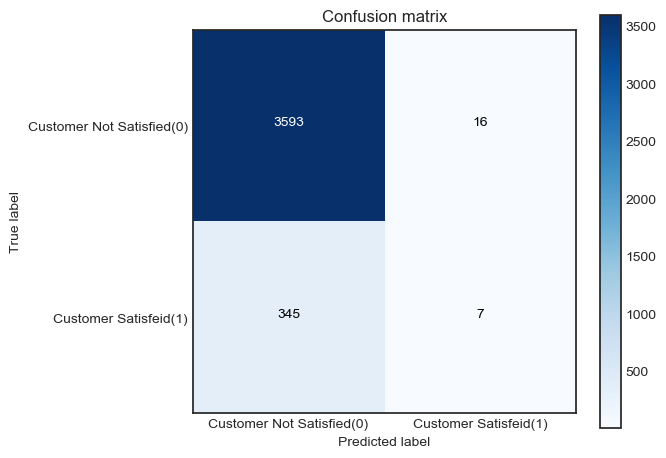

In [103]:
class_names = ['Customer Not Satisfied(0)','Customer Satisfeid(1)']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_lr , classes=class_names, title='Confusion matrix')
plt.show()

In [104]:
Accuracy_Test_lr=(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[1,1])/(confusion_matrix_test_lr[0,0]+confusion_matrix_test_lr[0,1]+confusion_matrix_test_lr[1,0]+confusion_matrix_test_lr[1,1])
TNR_Test_lr= confusion_matrix_test_lr[0,0]/(confusion_matrix_test_lr[0,0] +confusion_matrix_test_lr[0,1])
TPR_Test_lr= confusion_matrix_test_lr[1,1]/(confusion_matrix_test_lr[1,0] +confusion_matrix_test_lr[1,1])

print("Test TNR: ",TNR_Test_lr)
print("Test TPR: ",TPR_Test_lr)
print("Test Accuracy: ",Accuracy_Test_lr)

Test TNR:  0.9955666389581601
Test TPR:  0.019886363636363636
Test Accuracy:  0.9088613986367079


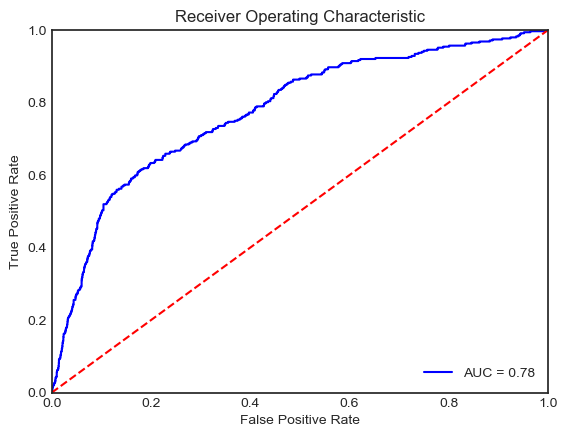

In [105]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_lr)
roc_auc_lr = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [107]:
print("Train Accuracy: ", acc_train_lr)
print("Test Accuracy: ", acc_test_lr)
print("Test Auc: ", roc_auc_lr)
print("Test TNR: ",TNR_Test_lr)
print("Test TPR: ",TPR_Test_lr)

Train Accuracy:  0.9055162837667255
Test Accuracy:  0.9088613986367079
Train Auc:  0.7765985919040783
Test TNR:  0.9955666389581601
Test TPR:  0.019886363636363636


In [108]:
# Model 2 SVM
from sklearn.svm import SVC
SVC = SVC(probability=True)
model_train_svc=SVC.fit(X_train, y_train)
y_pred_train_svc = SVC.predict(X_train)
y_pred_test_svc = SVC.predict(X_test)


In [109]:
y_prob_test_svc = SVC.predict_proba(X_test)[:,1]
acc_train_svc = accuracy_score(y_true=y_train,y_pred=y_pred_train_svc)
acc_test_svc = accuracy_score(y_true=y_test,y_pred=y_pred_test_svc)
print("Train SVC Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_svc))
print("Test SVC Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_svc))

Train SVC Accuracy: 0.9101868215097197
Test SVC Accuracy: 0.9111335521332997


In [110]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_svc = confusion_matrix(y_test, y_pred_test_svc)
print("\n Confusion matrix \n", confusion_matrix_test_svc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_svc))



 Confusion matrix 
 [[3609    0]
 [ 352    0]]

 Classification report 
              precision    recall  f1-score   support

          0       0.91      1.00      0.95      3609
          1       0.00      0.00      0.00       352

avg / total       0.83      0.91      0.87      3961



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


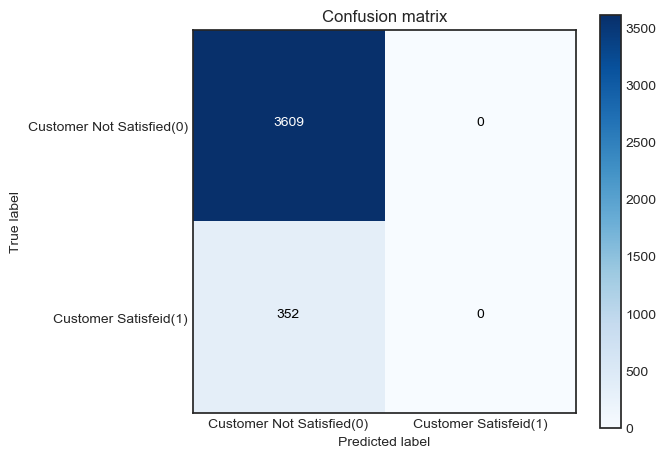

In [111]:
class_names = ['Customer Not Satisfied(0)','Customer Satisfeid(1)']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_svc , classes=class_names, title='Confusion matrix')
plt.show()

In [112]:
Accuracy_Test=(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[1,1])/(confusion_matrix_test_svc[0,0]+confusion_matrix_test_svc[0,1]+confusion_matrix_test_svc[1,0]+confusion_matrix_test_svc[1,1])
TNR_Test_svc= confusion_matrix_test_svc[0,0]/(confusion_matrix_test_svc[0,0] +confusion_matrix_test_svc[0,1])
TPR_Test_svc= confusion_matrix_test_svc[1,1]/(confusion_matrix_test_svc[1,0] +confusion_matrix_test_svc[1,1])

print("Test TNR: ",TNR_Test_svc)
print("Test TPR: ",TPR_Test_svc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  1.0
Test TPR:  0.0
Test Accuracy:  0.9111335521332997


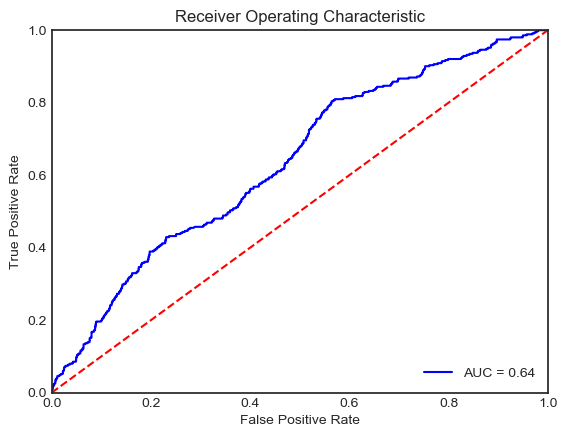

In [113]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_svc)
roc_auc_svc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_svc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [114]:
print("Train Accuracy: ", acc_train_svc)
print("Test Accuracy: ", acc_test_svc)
print("Train Auc: ", roc_auc_svc)
print("Test TNR: ",TNR_Test_svc)
print("Test TPR: ",TPR_Test_svc)

Train Accuracy:  0.9101868215097197
Test Accuracy:  0.9111335521332997
Train Auc:  0.6353466082269075
Test TNR:  1.0
Test TPR:  0.0


In [115]:
#Building the Decision Tree Model
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_train_dtc = dtc.predict(X_train)
y_pred_test_dtc = dtc.predict(X_test)



In [116]:
y_prob_test_dtc= dtc.predict_proba(X_test)[:,1]
acc_train_dtc= accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc)
acc_test_dtc = accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_dtc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_dtc))

Train Decision Tree Accuracy: 0.996718000504923
Test Decision Tree Accuracy: 0.8689724816965413


In [117]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_dtc = confusion_matrix(y_test, y_pred_test_dtc)
print("\n Confusion matrix \n", confusion_matrix_test_dtc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_dtc))





 Confusion matrix 
 [[3330  279]
 [ 240  112]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.92      0.93      3609
          1       0.29      0.32      0.30       352

avg / total       0.88      0.87      0.87      3961



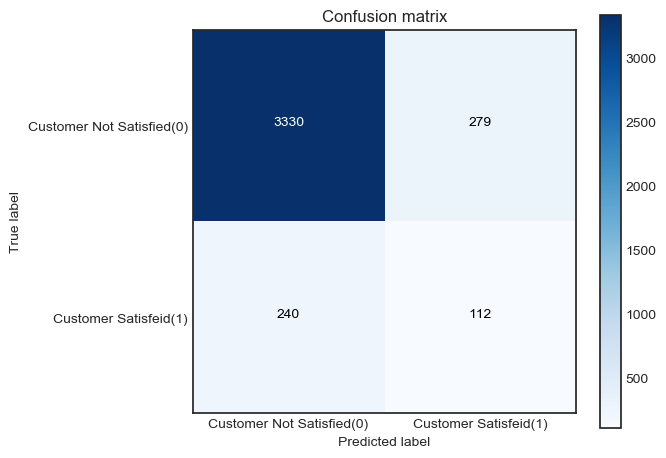

In [118]:
class_names = ['Customer Not Satisfied(0)','Customer Satisfeid(1)']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_dtc , classes=class_names, title='Confusion matrix')
plt.show()

In [119]:
Accuracy_Test=(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[1,1])/(confusion_matrix_test_dtc[0,0]+confusion_matrix_test_dtc[0,1]+confusion_matrix_test_dtc[1,0]+confusion_matrix_test_dtc[1,1])
TNR_Test_dtc= confusion_matrix_test_dtc[0,0]/(confusion_matrix_test_dtc[0,0] +confusion_matrix_test_dtc[0,1])
TPR_Test_dtc= confusion_matrix_test_dtc[1,1]/(confusion_matrix_test_dtc[1,0] +confusion_matrix_test_dtc[1,1])

print("Test TNR: ",TNR_Test_dtc)
print("Test TPR: ",TPR_Test_dtc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9226932668329177
Test TPR:  0.3181818181818182
Test Accuracy:  0.8689724816965413


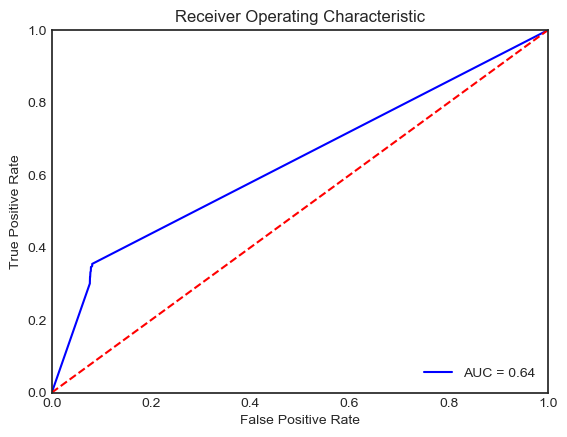

In [120]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_dtc)
roc_auc_dtc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_dtc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [121]:
print("Train Accuracy: ", acc_train_dtc)
print("Test Accuracy: ", acc_test_dtc)
print("Train Auc: ", roc_auc_dtc)
print("Test TNR: ",TNR_Test_dtc)
print("Test TPR: ",TPR_Test_dtc)

Train Accuracy:  0.996718000504923
Test Accuracy:  0.8689724816965413
Train Auc:  0.6355107338975792
Test TNR:  0.9226932668329177
Test TPR:  0.3181818181818182


In [122]:
#Building the RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=40,random_state=0)
model_train_rfc= rfc.fit(X_train,y_train)
y_pred_train_rfc = rfc.predict(X_train)
y_pred_test_rfc = rfc.predict(X_test)


In [123]:
y_prob_test_rfc= rfc.predict_proba(X_test)[:,1]
acc_train_rfc = accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc)
acc_test_rfc = accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_rfc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_rfc))

Train Decision Tree Accuracy: 0.9951401161322898
Test Decision Tree Accuracy: 0.9088613986367079


In [124]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_rfc = confusion_matrix(y_test, y_pred_test_rfc)
print("\n Confusion matrix \n", confusion_matrix_test_rfc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_rfc))





 Confusion matrix 
 [[3526   83]
 [ 278   74]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.98      0.95      3609
          1       0.47      0.21      0.29       352

avg / total       0.89      0.91      0.89      3961



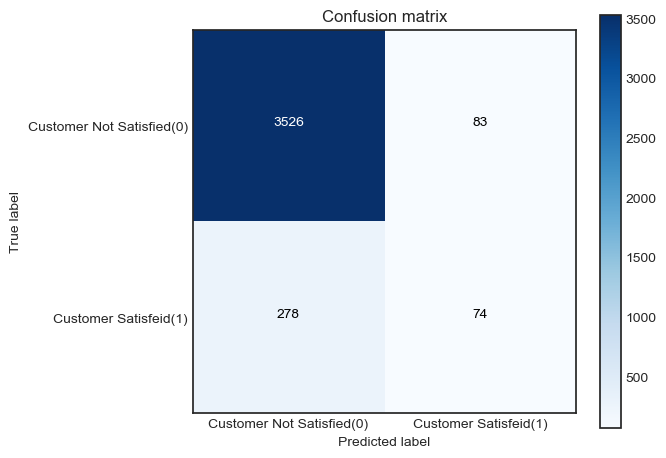

In [125]:
class_names = ['Customer Not Satisfied(0)','Customer Satisfeid(1)']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_rfc , classes=class_names, title='Confusion matrix')
plt.show()

In [126]:
Accuracy_Test=(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[1,1])/(confusion_matrix_test_rfc[0,0]+confusion_matrix_test_rfc[0,1]+confusion_matrix_test_rfc[1,0]+confusion_matrix_test_rfc[1,1])
TNR_Test_rfc= confusion_matrix_test_rfc[0,0]/(confusion_matrix_test_rfc[0,0] +confusion_matrix_test_rfc[0,1])
TPR_Test_rfc= confusion_matrix_test_rfc[1,1]/(confusion_matrix_test_rfc[1,0] +confusion_matrix_test_rfc[1,1])

print("Test TNR: ",TNR_Test_rfc)
print("Test TPR: ",TPR_Test_rfc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9770019395954558
Test TPR:  0.21022727272727273
Test Accuracy:  0.9088613986367079


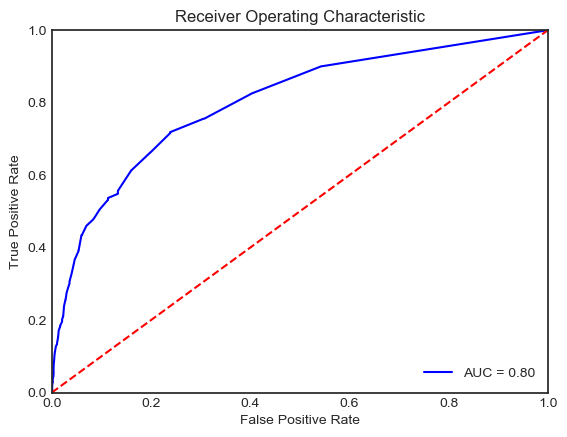

In [127]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_rfc)
roc_auc_rfc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_rfc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [128]:
print("Train Accuracy: ", acc_train_rfc)
print("Test Accuracy: ", acc_test_rfc)
print("Train Auc: ", roc_auc_rfc)
print("Test TNR: ",TNR_Test_rfc)
print("Test TPR: ",TPR_Test_rfc)

Train Accuracy:  0.9951401161322898
Test Accuracy:  0.9088613986367079
Train Auc:  0.8012882881180886
Test TNR:  0.9770019395954558
Test TPR:  0.21022727272727273


In [98]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
rfc_grid = RandomForestClassifier(n_jobs=-1)
param_grid = {
    'bootstrap': [True],
    'max_depth': [5,10],
    'max_features': [5,8,10,12,15],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10],
    'n_estimators': [100,200]
}
rfc_cv_grid = GridSearchCV(estimator = rfc_grid, param_grid = param_grid)

In [100]:
## Fit the grid search model
rfc_cv_grid.fit(X = X_train, y = y_train)

KeyboardInterrupt: 

In [75]:
## Print best score and parameters
print(rfc_cv_grid.best_score_,rfc_cv_grid.best_params_)
best_grid = rfc_cv_grid.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

AttributeError: 'GridSearchCV' object has no attribute 'best_score_'

In [129]:
res = pd.DataFrame([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

In [130]:
res.columns = ['Logistic','SVC','DTC','RFC']
res

,Logistic,SVC,DTC,RFC
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [131]:
from scipy.stats import mode

In [132]:
stack = np.array([y_pred_test_lr,y_pred_test_svc,y_pred_test_dtc,y_pred_test_rfc]).T

In [133]:
stacked_pred = mode(stack,axis=1)[0]
stacked_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [134]:
print("Decistion Trees accuracy", accuracy_score(y_test,y_pred_test_dtc))
print("Logistic Regression accuracy", accuracy_score(y_test, y_pred_test_lr))
print("SVC accuracy", accuracy_score(y_test, y_pred_test_svc))
print("RFC Accuracy", accuracy_score(y_test, y_pred_test_rfc))
print("Stacked Accuracy: ", accuracy_score(y_test,stacked_pred))

Decistion Trees accuracy 0.8689724816965413
Logistic Regression accuracy 0.9088613986367079
SVC accuracy 0.9111335521332997
RFC Accuracy 0.9088613986367079
Stacked Accuracy:  0.9116384751325423


In [135]:
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)
model_train_ada= ada.fit(X_train,y_train)
y_pred_train_ada = ada.predict(X_train)
y_pred_test_ada = ada.predict(X_test)

In [136]:
y_prob_test_ada= ada.predict_proba(X_test)[:,1]

acc_train_ada = accuracy_score(y_true=y_train,y_pred=y_pred_train_ada)
acc_test_ada = accuracy_score(y_true=y_test,y_pred=y_pred_test_ada)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada))

Train Decision Tree Accuracy: 0.9231885887402171
Test Decision Tree Accuracy: 0.9154253976268619


In [137]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada= confusion_matrix(y_test, y_pred_test_ada)
print("\n Confusion matrix \n", confusion_matrix_test_ada)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada))



 Confusion matrix 
 [[3549   60]
 [ 275   77]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.98      0.95      3609
          1       0.56      0.22      0.31       352

avg / total       0.90      0.92      0.90      3961



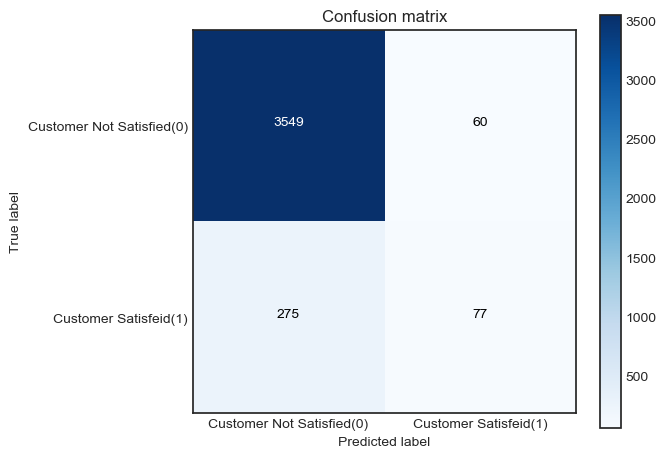

In [139]:
class_names = ['Customer Not Satisfied(0)','Customer Satisfeid(1)']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada , classes=class_names, title='Confusion matrix')
plt.show()

In [140]:
Accuracy_Test=(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[1,1])/(confusion_matrix_test_ada[0,0]+confusion_matrix_test_ada[0,1]+confusion_matrix_test_ada[1,0]+confusion_matrix_test_ada[1,1])
TNR_Test_ada= confusion_matrix_test_ada[0,0]/(confusion_matrix_test_ada[0,0] +confusion_matrix_test_ada[0,1])
TPR_Test_ada= confusion_matrix_test_ada[1,1]/(confusion_matrix_test_ada[1,0] +confusion_matrix_test_ada[1,1])

print("Test TNR: ",TNR_Test_ada)
print("Test TPR: ",TPR_Test_ada)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9833748960931006
Test TPR:  0.21875
Test Accuracy:  0.9154253976268619


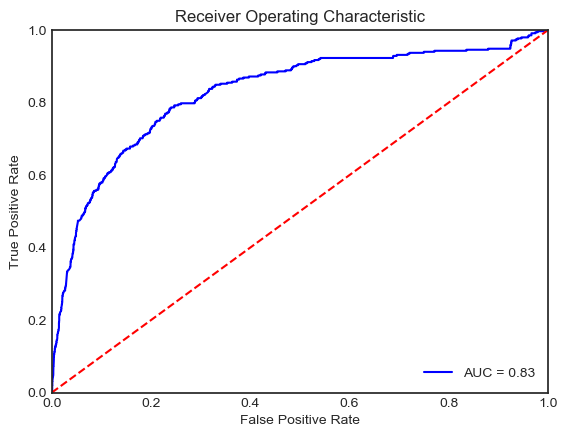

In [141]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada)
roc_auc_ada = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [142]:
print("Train Accuracy: ", acc_train_ada)
print("Test Accuracy: ", acc_test_ada)
print("Train Auc: ", roc_auc_ada)
print("Test TNR: ",TNR_Test_ada)
print("Test TPR: ",TPR_Test_ada)

Train Accuracy:  0.9231885887402171
Test Accuracy:  0.9154253976268619
Train Auc:  0.827413395173682
Test TNR:  0.9833748960931006
Test TPR:  0.21875


In [143]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators' : [100, 150, 200],
              'learning_rate' : [0.1, 0.5, 0.9]}

Adaboost_model_clf = GridSearchCV(AdaBoostClassifier(
            DecisionTreeClassifier(max_depth=2)), param_grid, n_jobs=-1)

In [144]:
%time Adaboost_model_clf.fit(X_train, y_train)
#Wall time: 53min 47s
#GridSearchCV(cv=None, error_score='raise',
#      estimator=AdaBoostClassifier(algorithm='SAMME.R',
#         base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
#            max_features=None, max_leaf_nodes=None,
#            min_impurity_decrease=0.0, min_impurity_split=None,
#            min_samples_leaf=1, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#            splitter='best'),
#          learning_rate=1.0, n_estimators=50, random_state=None),
#       fit_params=None, iid=True, n_jobs=-1,
#       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
#       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
#      scoring=None, verbose=0)

Wall time: 3min 20s


GridSearchCV(cv=None, error_score='raise',
       estimator=AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [100, 150, 200], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [145]:
# Find best model
final_ada_model = Adaboost_model_clf.best_estimator_
print (Adaboost_model_clf.best_score_, Adaboost_model_clf.best_params_)

0.9122065135066902 {'learning_rate': 0.1, 'n_estimators': 200}


In [146]:
# Build ada model using above Hyper parameters
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada_final = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200,
    learning_rate=0.1)
model_train_ada_final= ada_final.fit(X_train,y_train)
y_pred_train_ada_final = ada_final.predict(X_train)
y_pred_test_ada_final = ada_final.predict(X_test)

In [147]:
y_prob_test_ada_final= ada_final.predict_proba(X_test)[:,1]
acc_train_ada_final = accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final)
acc_test_ada_final = accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_ada_final))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_ada_final))

Train Decision Tree Accuracy: 0.9173188588740218
Test Decision Tree Accuracy: 0.9176975511234536


In [148]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada_final= confusion_matrix(y_test, y_pred_test_ada_final)
print("\n Confusion matrix \n", confusion_matrix_test_ada_final)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada_final))


 Confusion matrix 
 [[3590   19]
 [ 307   45]]

 Classification report 
              precision    recall  f1-score   support

          0       0.92      0.99      0.96      3609
          1       0.70      0.13      0.22       352

avg / total       0.90      0.92      0.89      3961



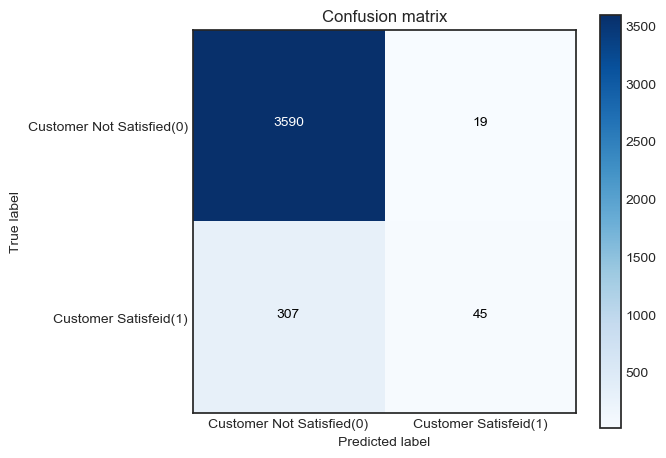

In [150]:
class_names = ['Customer Not Satisfied(0)','Customer Satisfeid(1)']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada_final , classes=class_names, title='Confusion matrix')
plt.show()

In [151]:
Accuracy_Test=(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[1,1])/(confusion_matrix_test_ada_final[0,0]+confusion_matrix_test_ada_final[0,1]+confusion_matrix_test_ada_final[1,0]+confusion_matrix_test_ada_final[1,1])
TNR_Test_ada_final= confusion_matrix_test_ada_final[0,0]/(confusion_matrix_test_ada_final[0,0] +confusion_matrix_test_ada_final[0,1])
TPR_Test_ada_final= confusion_matrix_test_ada_final[1,1]/(confusion_matrix_test_ada_final[1,0] +confusion_matrix_test_ada_final[1,1])

print("Test TNR: ",TNR_Test_ada_final)
print("Test TPR: ",TPR_Test_ada_final)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9947353837628152
Test TPR:  0.1278409090909091
Test Accuracy:  0.9176975511234536


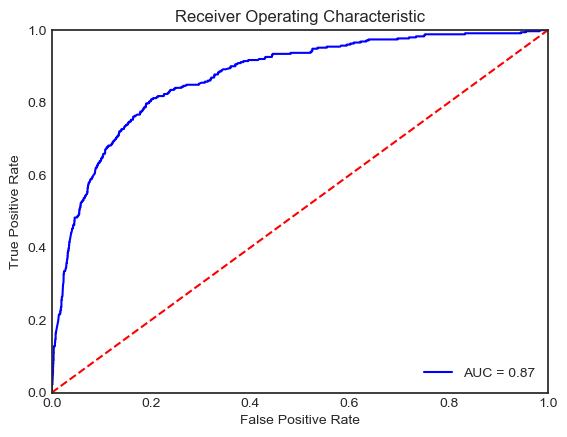

In [152]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada_final)
roc_auc_ada_final = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [153]:
print("Train Accuracy: ", acc_train_ada_final)
print("Train Accuracy: ", acc_train_ada_final)
print("Train Auc: ", roc_auc_ada_final)
print("Test TNR: ",TNR_Test_ada_final)
print("Test TPR: ",TPR_Test_ada_final)

Train Accuracy:  0.9173188588740218
Train Accuracy:  0.9173188588740218
Train Auc:  0.8712487247789618
Test TNR:  0.9947353837628152
Test TPR:  0.1278409090909091


In [154]:
## Model Building uisng Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm =  GradientBoostingClassifier(n_estimators=150,
                                        learning_rate=0.1,
                                        subsample=0.8)
model_train_gbm= gbm.fit(X_train,y_train)
y_pred_train_gbm = gbm.predict(X_train)
y_pred_test_gbm = gbm.predict(X_test)

In [155]:
y_prob_test_gbm= gbm.predict_proba(X_test)[:,1]
acc_train_gbm = accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm)
acc_test_gbm = accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm))

Train Decision Tree Accuracy: 0.9218631658672053
Test Decision Tree Accuracy: 0.9174450896238323


In [156]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_gbm= confusion_matrix(y_test, y_pred_test_gbm)
print("\n Confusion matrix \n", confusion_matrix_test_gbm)
print("\n Classification report \n", classification_report(y_test,y_pred_test_gbm))


 Confusion matrix 
 [[3579   30]
 [ 297   55]]

 Classification report 
              precision    recall  f1-score   support

          0       0.92      0.99      0.96      3609
          1       0.65      0.16      0.25       352

avg / total       0.90      0.92      0.89      3961



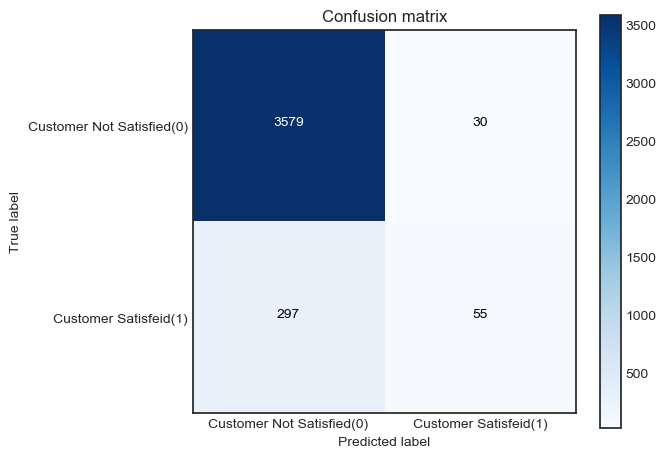

In [158]:
class_names = ['Customer Not Satisfied(0)','Customer Satisfeid(1)']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_gbm , classes=class_names, title='Confusion matrix')
plt.show()

In [159]:
Accuracy_Test=(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[1,1])/(confusion_matrix_test_gbm[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_gbm[1,0]+confusion_matrix_test_gbm[1,1])
TNR_Test_gbm= confusion_matrix_test_gbm[0,0]/(confusion_matrix_test_gbm[0,0] +confusion_matrix_test_gbm[0,1])
TPR_Test_gbm= confusion_matrix_test_gbm[1,1]/(confusion_matrix_test_gbm[1,0] +confusion_matrix_test_gbm[1,1])

print("Test TNR: ",TNR_Test_gbm)
print("Test TPR: ",TPR_Test_gbm)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9916874480465503
Test TPR:  0.15625
Test Accuracy:  0.9174450896238323


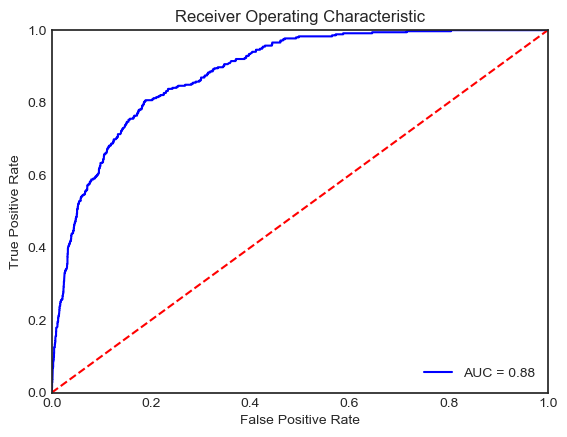

In [160]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_gbm)
roc_auc_gbm = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbm)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [161]:
print("Train Accuracy: ", acc_train_gbm)
print("Test Accuracy: ", acc_test_gbm)
print("Train Auc: ", roc_auc_gbm)
print("Test TNR: ",TNR_Test_gbm)
print("Test TPR: ",TPR_Test_gbm)

Train Accuracy:  0.9218631658672053
Test Accuracy:  0.9174450896238323
Train Auc:  0.8847609511574599
Test TNR:  0.9916874480465503
Test TPR:  0.15625


In [162]:
#Grid Search Cross validation
from sklearn.model_selection import GridSearchCV

# Model in use
GBM_Grid = GradientBoostingClassifier() 
 
# Use a grid over parameters of interest
param_grid = { 
           "n_estimators" : [100,150,200,250],
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.5,0.9]}
 
GBM_CV = GridSearchCV(estimator=GBM_Grid, param_grid=param_grid)

In [163]:
%time GBM_CV.fit(X_train, y_train)

Wall time: 1h 3min 48s


GridSearchCV(cv=None, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 150, 200, 250], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.5, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [164]:
# Find best model
final_gbm_model = GBM_CV.best_estimator_
print (GBM_CV.best_score_, GBM_CV.best_params_)

0.9127745518808382 {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [165]:
## Model Building uisng Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm_final =  GradientBoostingClassifier(n_estimators=100,
                                        learning_rate=0.1,
                                        subsample=0.8,
                                        max_depth=5)
model_train_gbm_final= gbm_final.fit(X_train,y_train)
y_pred_train_gbm_final = gbm_final.predict(X_train)
y_pred_test_gbm_final = gbm_final.predict(X_test)

In [166]:
y_prob_test_gbm_final = gbm_final.predict_proba(X_test)[:,1]
acc_train_gbm_final = accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm_final)
acc_test_gbm_final = accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm_final)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_gbm_final))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_gbm_final))

Train Decision Tree Accuracy: 0.9298788184801817
Test Decision Tree Accuracy: 0.917950012623075


In [167]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_gbm_final= confusion_matrix(y_test, y_pred_test_gbm_final)
print("\n Confusion matrix \n", confusion_matrix_test_gbm_final)
print("\n Classification report \n", classification_report(y_test,y_pred_test_gbm_final))


 Confusion matrix 
 [[3570   39]
 [ 286   66]]

 Classification report 
              precision    recall  f1-score   support

          0       0.93      0.99      0.96      3609
          1       0.63      0.19      0.29       352

avg / total       0.90      0.92      0.90      3961



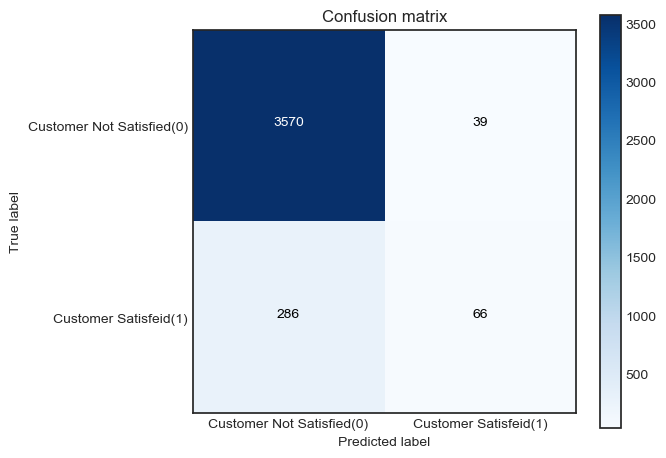

In [168]:
class_names = ['Customer Not Satisfied(0)','Customer Satisfeid(1)']
plt.figure()
plot_confusion_matrix(confusion_matrix_test_gbm_final , classes=class_names, title='Confusion matrix')
plt.show()

In [169]:
Accuracy_Test=(confusion_matrix_test_gbm_final[0,0]+confusion_matrix_test_gbm_final[1,1])/(confusion_matrix_test_gbm_final[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_gbm[1,0]+confusion_matrix_test_gbm_final[1,1])
TNR_Test_gbm_final= confusion_matrix_test_gbm_final[0,0]/(confusion_matrix_test_gbm_final[0,0] +confusion_matrix_test_gbm_final[0,1])
TPR_Test_gbm_final= confusion_matrix_test_gbm_final[1,1]/(confusion_matrix_test_gbm_final[1,0] +confusion_matrix_test_gbm_final[1,1])

print("Test TNR: ",TNR_Test_gbm_final)
print("Test TPR: ",TPR_Test_gbm_final)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9891936824605154
Test TPR:  0.1875
Test Accuracy:  0.9174867524602573


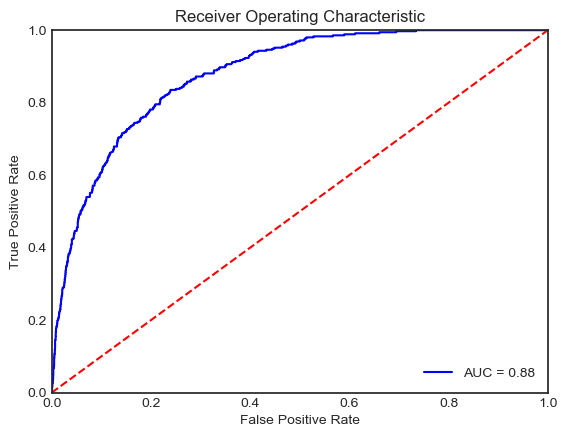

In [170]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_gbm_final)
roc_auc_gbm_final = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_gbm_final)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [171]:
print("Train Accuracy: ", acc_train_gbm_final)
print("Test Accuracy: ", acc_test_gbm_final)
print("Train Auc: ", roc_auc_gbm_final)
print("Test TNR: ",TNR_Test_gbm_final)
print("Test TPR: ",TPR_Test_gbm_final)

Train Accuracy:  0.9298788184801817
Test Accuracy:  0.917950012623075
Train Auc:  0.8784718286354821
Test TNR:  0.9891936824605154
Test TPR:  0.1875


In [172]:
# Build Model XGBOOST
from xgboost import XGBClassifier
xgb = XGBClassifier()
model_train_xgb= xgb.fit(X_train,y_train)
y_pred_train_xgb = xgb.predict(X_train)
y_pred_test_xgb = xgb.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [173]:
y_prob_test_xgb= xgb.predict_proba(X_test)[:,1]
acc_train_xgb = accuracy_score(y_true=y_train,y_pred=y_pred_train_xgb)
acc_test_xgb = accuracy_score(y_true=y_test,y_pred=y_pred_test_xgb)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_xgb))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_xgb))

Train Decision Tree Accuracy: 0.9163090128755365
Test Decision Tree Accuracy: 0.9169401666245898


In [174]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_xgb= confusion_matrix(y_test, y_pred_test_xgb)
cr = classification_report(y_test,y_pred_test_xgb)
print("\n Confusion matrix \n", confusion_matrix_test_xgb)
print("\n Classification report \n", classification_report(y_test,y_pred_test_xgb))


 Confusion matrix 
 [[3593   16]
 [ 313   39]]

 Classification report 
              precision    recall  f1-score   support

          0       0.92      1.00      0.96      3609
          1       0.71      0.11      0.19       352

avg / total       0.90      0.92      0.89      3961



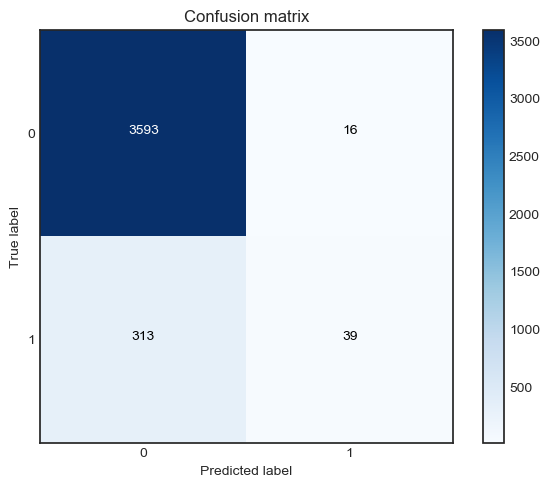

In [175]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_xgb , classes=class_names, title='Confusion matrix')
plt.show()

In [176]:
Accuracy_Test=(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_xgb[1,1])/(confusion_matrix_test_xgb[0,0]+confusion_matrix_test_gbm[0,1]+confusion_matrix_test_xgb[1,0]+confusion_matrix_test_xgb[1,1])
TNR_Test_xgb= confusion_matrix_test_gbm[0,0]/(confusion_matrix_test_xgb[0,0] +confusion_matrix_test_xgb[0,1])
TPR_Test_xgb= confusion_matrix_test_gbm[1,1]/(confusion_matrix_test_xgb[1,0] +confusion_matrix_test_xgb[1,1])

print("Test TNR: ",TNR_Test_xgb)
print("Test TPR: ",TPR_Test_xgb)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.9916874480465503
Test TPR:  0.15625
Test Accuracy:  0.9137106918238994


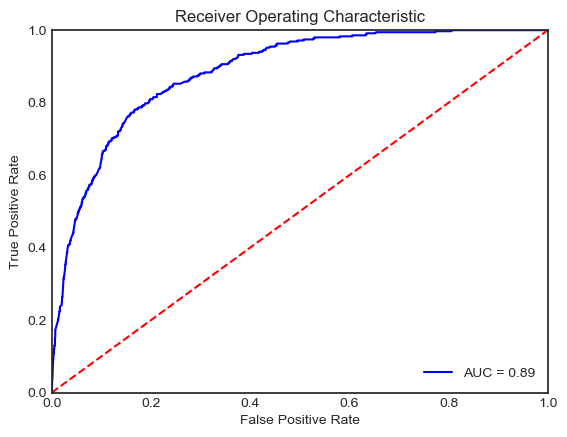

In [177]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_xgb)
roc_auc_xgb = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_xgb)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [178]:
print("Train Accuracy: ", acc_train_xgb)
print("Test Accuracy: ", acc_test_xgb)
print("Train Auc: ", roc_auc_xgb)
print("Test TNR: ",TNR_Test_xgb)
print("Test TPR: ",TPR_Test_xgb)

Train Accuracy:  0.9163090128755365
Test Accuracy:  0.9169401666245898
Train Auc:  0.88513682649437
Test TNR:  0.9916874480465503
Test TPR:  0.15625


In [179]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Model in use
xgb_Grid = xgb.XGBClassifier()
 
# Use a grid over parameters of interest
param_grid = { 
           "nthread":[4,5], 
           "max_depth" : [5, 10],
           "learning_rate" : [0.1,0.05,0.2],
           "n_estimators": [3,5],
           "objective":["binary:logistic"]}
 
xgb_clf = GridSearchCV(estimator=xgb_Grid, param_grid=param_grid)

In [180]:
%time xgb_clf.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

Wall time: 36.8 s


GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'nthread': [4, 5], 'max_depth': [5, 10], 'learning_rate': [0.1, 0.05, 0.2], 'n_estimators': [3, 5], 'objective': ['binary:logistic']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [181]:
# Find best model
final_gbm_model = xgb_clf.best_estimator_
print (xgb_clf.best_score_, xgb_clf.best_params_)

0.9123327442565009 {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 5, 'nthread': 4, 'objective': 'binary:logistic'}


In [182]:
# Build bagging Model 
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
bag = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bag= bag.fit(X_train,y_train)
y_pred_train_bag = bag.predict(X_train)
y_pred_test_bag = bag.predict(X_test)

In [183]:
y_prob_test_bag= bag.predict_proba(X_test)[:,1]

acc_train_bag = accuracy_score(y_true=y_train,y_pred=y_pred_train_bag)
acc_test_bag = accuracy_score(y_true=y_test,y_pred=y_pred_test_bag)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bag))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bag))

Train Decision Tree Accuracy: 0.259845998485231
Test Decision Tree Accuracy: 0.2701338045947993


In [184]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bag= confusion_matrix(y_test, y_pred_test_bag)
print("\n Confusion matrix \n", confusion_matrix_test_bag)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bag))


 Confusion matrix 
 [[ 814 2795]
 [  96  256]]

 Classification report 
              precision    recall  f1-score   support

          0       0.89      0.23      0.36      3609
          1       0.08      0.73      0.15       352

avg / total       0.82      0.27      0.34      3961



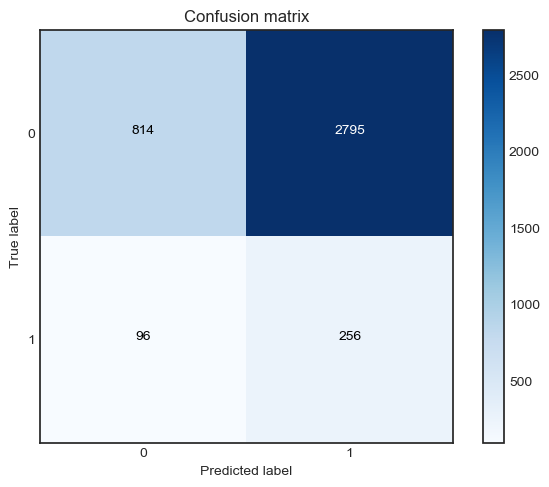

In [185]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_bag , classes=class_names, title='Confusion matrix')
plt.show()

In [186]:
Accuracy_Test=(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[1,1])/(confusion_matrix_test_bag[0,0]+confusion_matrix_test_bag[0,1]+confusion_matrix_test_bag[1,0]+confusion_matrix_test_bag[1,1])
TNR_Test_bag= confusion_matrix_test_bag[0,0]/(confusion_matrix_test_bag[0,0] +confusion_matrix_test_bag[0,1])
TPR_Test_bag= confusion_matrix_test_bag[1,1]/(confusion_matrix_test_bag[1,0] +confusion_matrix_test_bag[1,1])

print("Test TNR: ",TNR_Test_bag)
print("Test TPR: ",TPR_Test_bag)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.2255472430036021
Test TPR:  0.7272727272727273
Test Accuracy:  0.2701338045947993


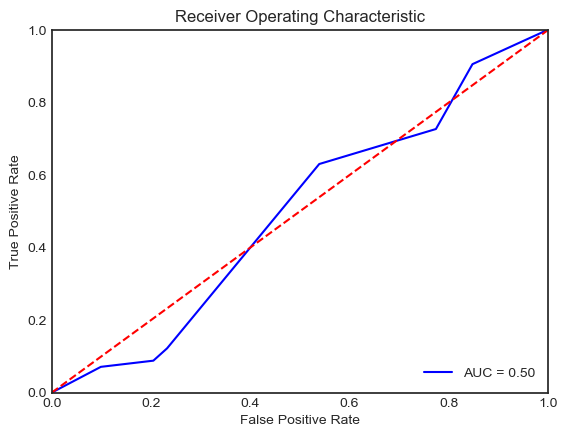

In [187]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bag)
roc_auc_bag = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bag)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [188]:
print("Train Accuracy: ", acc_train_bag)
print("Test Accuracy: ", acc_test_bag)
print("Train Auc: ", roc_auc_bag)
print("Test TNR: ",TNR_Test_bag)
print("Test TPR: ",TPR_Test_bag)

Train Accuracy:  0.259845998485231
Test Accuracy:  0.2701338045947993
Train Auc:  0.49505143391521206
Test TNR:  0.2255472430036021
Test TPR:  0.7272727272727273


In [189]:
# Build Balanced bagging classifier model
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import tree
bbc = BalancedBaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
model_train_bbc= bbc.fit(X_train,y_train)
y_pred_train_bbc = bbc.predict(X_train)
y_pred_test_bbc = bbc.predict(X_test)

In [190]:
y_prob_test_bbc= bbc.predict_proba(X_test)[:,1]

acc_train_bbc = accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc)
acc_test_bbc = accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc) 

print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train,y_pred=y_pred_train_bbc))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test,y_pred=y_pred_test_bbc))

Train Decision Tree Accuracy: 0.8225195657662207
Test Decision Tree Accuracy: 0.7891946478162081


In [191]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_bbc= confusion_matrix(y_test, y_pred_test_bbc)
print("\n Confusion matrix \n", confusion_matrix_test_bbc)
print("\n Classification report \n", classification_report(y_test,y_pred_test_bbc))


 Confusion matrix 
 [[2874  735]
 [ 100  252]]

 Classification report 
              precision    recall  f1-score   support

          0       0.97      0.80      0.87      3609
          1       0.26      0.72      0.38       352

avg / total       0.90      0.79      0.83      3961



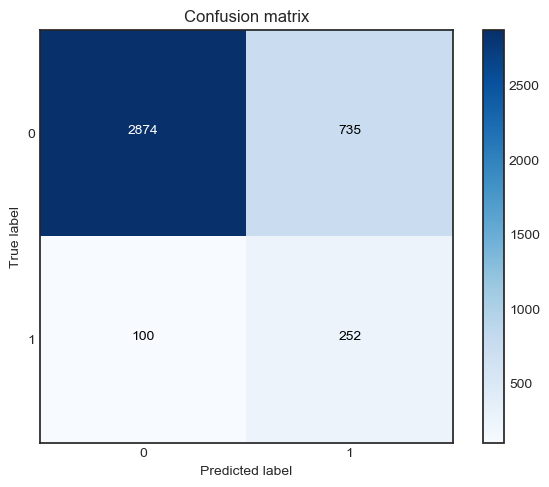

In [192]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_bbc , classes=class_names, title='Confusion matrix')
plt.show()

In [193]:
Accuracy_Test=(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[1,1])/(confusion_matrix_test_bbc[0,0]+confusion_matrix_test_bbc[0,1]+confusion_matrix_test_bbc[1,0]+confusion_matrix_test_bbc[1,1])
TNR_Test_bbc= confusion_matrix_test_bbc[0,0]/(confusion_matrix_test_bbc[0,0] +confusion_matrix_test_bbc[0,1])
TPR_Test_bbc= confusion_matrix_test_bbc[1,1]/(confusion_matrix_test_bbc[1,0] +confusion_matrix_test_bbc[1,1])

print("Test TNR: ",TNR_Test_bbc)
print("Test TPR: ",TPR_Test_bbc)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.7963424771404821
Test TPR:  0.7159090909090909
Test Accuracy:  0.7891946478162081


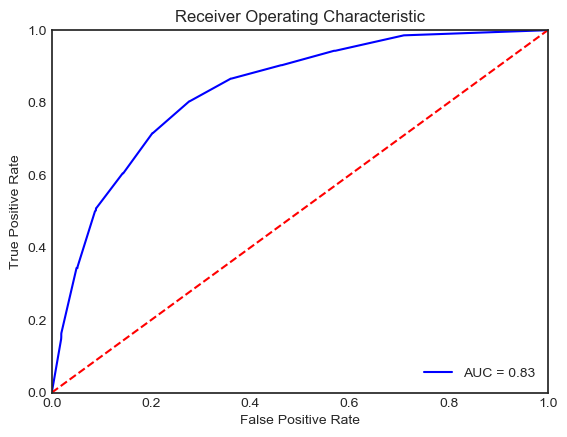

In [194]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_bbc)
roc_auc_bbc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_bbc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [195]:
print("Train Accuracy: ", acc_train_bbc)
print("Test Accuracy: ", acc_test_bbc)
print("Train Auc: ", roc_auc_bbc)
print("Test TNR: ",TNR_Test_bbc)
print("Test TPR: ",TPR_Test_bbc)

Train Accuracy:  0.8225195657662207
Test Accuracy:  0.7891946478162081
Train Auc:  0.8337025176956598
Test TNR:  0.7963424771404821
Test TPR:  0.7159090909090909


In [196]:
## Aplying SMOTE
# Find the Target value distribution
train_labels.value_counts()

0    17997
1     1808
Name: TARGET, dtype: int64

In [197]:

train_labels.head(6)
train_labels.shape
train_labels.columns = ['target']

In [198]:
train_labels.head(6)

0    0
1    0
2    0
3    0
4    0
5    0
Name: TARGET, dtype: int64

In [199]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.countplot(x='target',data = train_labels)

ValueError: Could not interpret input 'target'

<Figure size 1000x600 with 0 Axes>

In [201]:
train1 = train.copy()

In [202]:

train1.isnull().sum()

var3                        0
var15                       0
imp_ent_var16_ult1          0
imp_op_var39_comer_ult1     0
imp_op_var41_efect_ult1     0
imp_op_var41_ult1           0
ind_var30_0                 0
ind_var39_0                 0
num_var4                    0
num_op_var41_hace2          0
saldo_var5                  0
saldo_var8                  0
saldo_var26                 0
saldo_var30                 0
saldo_var37                 0
var36                       0
imp_var43_emit_ult1         0
imp_trans_var37_ult1        0
num_var22_hace2             0
num_var22_hace3             0
num_var22_ult1              0
num_var22_ult3              0
num_med_var45_ult3          0
num_meses_var39_vig_ult3    0
num_var43_recib_ult1        0
num_var45_hace3             0
num_var45_ult1              0
saldo_medio_var5_hace2      0
saldo_medio_var5_hace3      0
saldo_medio_var5_ult1       0
saldo_medio_var5_ult3       0
var38                       0
dtype: int64

In [203]:
# Split the Train and Test Data
from sklearn.model_selection import train_test_split
# Split the data into X and y
X = train1
y = train_labels

print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(y.shape))

Shape of X: (19805, 32)
Shape of y: (19805,)


In [204]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=1)

print("Number transactions X_train dataset: ", X_train1.shape)
print("Number transactions y_train dataset: ", y_train1.shape)
print("Number transactions X_test dataset: ", X_test1.shape)
print("Number transactions y_test dataset: ", y_test1.shape)

Number transactions X_train dataset:  (15844, 32)
Number transactions y_train dataset:  (15844,)
Number transactions X_test dataset:  (3961, 32)
Number transactions y_test dataset:  (3961,)


In [205]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train1==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train1==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train1, y_train1)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1456
Before OverSampling, counts of label '0': 14388 

After OverSampling, the shape of train_X: (28776, 32)
After OverSampling, the shape of train_y: (28776,) 

After OverSampling, counts of label '1': 14388
After OverSampling, counts of label '0': 14388


In [206]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train1.iloc[:,0:32])

X_train1.iloc[:,0:32] = scaler.transform(X_train1.iloc[:,0:32])
X_test1.iloc[:,0:32] = scaler.transform(X_test1.iloc[:,0:32])

C:\Users\Prashanth Yerabati\AppData\Roaming\Python\Python36\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [207]:
## Model Builsing using Boosing
from sklearn.ensemble import AdaBoostClassifier
ada_smote = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=100,
    learning_rate=1)
model_train_ada= ada_smote.fit(X_train_res,y_train_res)
y_pred_train_ada_smote = ada_smote.predict(X_train_res)
y_pred_test_ada_smote = ada_smote.predict(X_test1)

In [208]:
y_prob_test_ada_smote= ada_smote.predict_proba(X_test1)[:,1]

acc_train_ada_smote = accuracy_score(y_true=y_train_res,y_pred=y_pred_train_ada_smote)
acc_test_ada_smote = accuracy_score(y_true=y_test1,y_pred=y_pred_test_ada_smote)
print("Train Decision Tree Accuracy:",accuracy_score(y_true=y_train_res,y_pred=y_pred_train_ada_smote))
print("Test Decision Tree Accuracy:",accuracy_score(y_true=y_test1,y_pred=y_pred_test_ada_smote))

Train Decision Tree Accuracy: 0.9410967472894078
Test Decision Tree Accuracy: 0.5733400656399898


In [209]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
confusion_matrix_test_ada_smote= confusion_matrix(y_test, y_pred_test_ada_smote)
print("\n Confusion matrix \n", confusion_matrix_test_ada_smote)
print("\n Classification report \n", classification_report(y_test,y_pred_test_ada_smote))



 Confusion matrix 
 [[2149 1460]
 [ 230  122]]

 Classification report 
              precision    recall  f1-score   support

          0       0.90      0.60      0.72      3609
          1       0.08      0.35      0.13       352

avg / total       0.83      0.57      0.67      3961



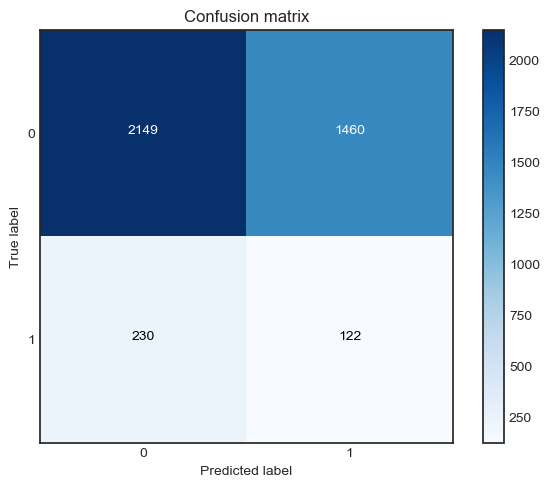

In [210]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(confusion_matrix_test_ada_smote , classes=class_names, title='Confusion matrix')
plt.show()

In [211]:
Accuracy_Test=(confusion_matrix_test_ada_smote[0,0]+confusion_matrix_test_ada_smote[1,1])/(confusion_matrix_test_ada_smote[0,0]+confusion_matrix_test_ada_smote[0,1]+confusion_matrix_test_ada_smote[1,0]+confusion_matrix_test_ada_smote[1,1])
TNR_Test_ada_smote= confusion_matrix_test_ada_smote[0,0]/(confusion_matrix_test_ada_smote[0,0] +confusion_matrix_test_ada_smote[0,1])
TPR_Test_ada_smote= confusion_matrix_test_ada_smote[1,1]/(confusion_matrix_test_ada_smote[1,0] +confusion_matrix_test_ada_smote[1,1])

print("Test TNR: ",TNR_Test_ada_smote)
print("Test TPR: ",TPR_Test_ada_smote)
print("Test Accuracy: ",Accuracy_Test)

Test TNR:  0.5954558049321141
Test TPR:  0.3465909090909091
Test Accuracy:  0.5733400656399898


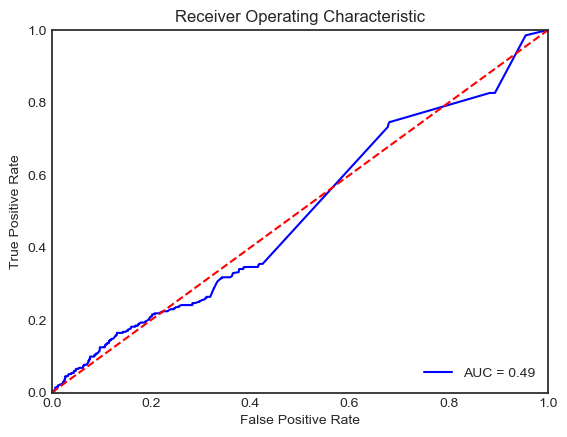

In [212]:
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(y_test, y_prob_test_ada_smote)
roc_auc_ada_smote = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc_ada_smote)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [213]:
print("Train Accuracy: ", acc_train_ada_smote)
print("Test Accuracy: ", acc_test_ada_smote)
print("Train Auc: ", roc_auc_ada_smote)
print("Test TNR: ",TNR_Test_ada_smote)
print("Test TPR: ",TPR_Test_ada_smote)

Train Accuracy:  0.9410967472894078
Test Accuracy:  0.5733400656399898
Train Auc:  0.49396592168568476
Test TNR:  0.5954558049321141
Test TPR:  0.3465909090909091


In [214]:
from prettytable import PrettyTable
t = PrettyTable(['Name','Train_accuracy', 'Test_accuracy', 'Roc_Auc', 'Test TNR', 'Test TPR'])
t.add_row(["Logistic Regression",acc_train_lr,acc_test_lr,roc_auc_lr,TNR_Test_lr,TPR_Test_lr])
t.add_row(["SVC",acc_train_svc,acc_test_svc,roc_auc_svc,TNR_Test_svc,TPR_Test_svc])
t.add_row(["DTC",acc_train_dtc,acc_test_dtc,roc_auc_dtc,TNR_Test_dtc,TPR_Test_dtc])
t.add_row(["RFC",acc_train_rfc,acc_test_rfc,roc_auc_rfc,TNR_Test_rfc,TPR_Test_rfc])
t.add_row(["ADABOOST_BASIC",acc_train_ada,acc_test_ada,roc_auc_ada,TNR_Test_ada,TPR_Test_ada])
t.add_row(["ADABOOST FINAL",acc_train_ada_final,acc_test_ada_final,roc_auc_ada_final,TNR_Test_ada_final,TPR_Test_ada_final])
t.add_row(["GBC BASIC",acc_train_gbm,acc_test_gbm,roc_auc_gbm,TNR_Test_gbm,TPR_Test_gbm])
t.add_row(["GBC FINAL",acc_train_gbm_final,acc_test_gbm_final,roc_auc_gbm_final,TNR_Test_gbm_final,TPR_Test_gbm_final])
t.add_row(["XGBOOST BASIC",acc_train_xgb,acc_test_xgb,roc_auc_xgb,TNR_Test_xgb,TPR_Test_xgb])
#t.add_row(["XGBOOST FINAL",acc_train_xgb_final,acc_test_xgb_final,roc_auc_xgb_final,TNR_Test_xgb_final,TPR_Test_xgb_final])
t.add_row(["BAGGING",acc_train_bag,acc_test_bag,roc_auc_bag,TNR_Test_bag,TPR_Test_bag])
t.add_row(["BALANCED BAGGING",acc_train_bbc,acc_test_bbc,roc_auc_bbc,TNR_Test_bbc,TPR_Test_bbc])
t.add_row(["SMOTE ADABOOST",acc_train_ada_smote,acc_test_ada_smote,roc_auc_ada_smote,TNR_Test_ada_smote,TPR_Test_ada_smote])
 
print(t.get_string(title="Results")) 

+---------------------+--------------------+--------------------+---------------------+--------------------+----------------------+
|         Name        |   Train_accuracy   |   Test_accuracy    |       Roc_Auc       |      Test TNR      |       Test TPR       |
+---------------------+--------------------+--------------------+---------------------+--------------------+----------------------+
| Logistic Regression | 0.9055162837667255 | 0.9088613986367079 |  0.7765985919040783 | 0.9955666389581601 | 0.019886363636363636 |
|         SVC         | 0.9101868215097197 | 0.9111335521332997 |  0.6353466082269075 |        1.0         |         0.0          |
|         DTC         | 0.996718000504923  | 0.8689724816965413 |  0.6355107338975792 | 0.9226932668329177 |  0.3181818181818182  |
|         RFC         | 0.9951401161322898 | 0.9088613986367079 |  0.8012882881180886 | 0.9770019395954558 | 0.21022727272727273  |
|    ADABOOST_BASIC   | 0.9231885887402171 | 0.9154253976268619 |  0.8274133

In [215]:
print("\n Classification report Logistic Classification \n", classification_report(y_test,y_pred_test_lr))
print("\n Classification report  SVC \n", classification_report(y_test,y_pred_test_svc))
print("\n Classification report DTC \n", classification_report(y_test,y_pred_test_dtc))
print("\n Classification report RFC \n", classification_report(y_test,y_pred_test_rfc))
print("\n Classification report ADABOOST BASIC\n", classification_report(y_test,y_pred_test_ada))
print("\n Classification report ADABOOST FINAL \n", classification_report(y_test,y_pred_test_ada_final))
print("\n Classification report GBM BASIC \n", classification_report(y_test,y_pred_test_gbm))
print("\n Classification report GBM FINAL \n", classification_report(y_test,y_pred_test_gbm_final))
print("\n Classification report XGBOOST BASIC \n", classification_report(y_test,y_pred_test_xgb))
#print("\n Classification report XGBOOST FINAL \n", classification_report(y_test,y_pred_test_xgb_final))
print("\n Classification report BAGGING \n", classification_report(y_test,y_pred_test_bag))
print("\n Classification report BALANCED BAGING \n", classification_report(y_test,y_pred_test_bbc))
print("\n Classification report ADAMOOST & SMOTE \n", classification_report(y_test,y_pred_test_ada_smote))


 Classification report Logistic Classification 
              precision    recall  f1-score   support

          0       0.91      1.00      0.95      3609
          1       0.30      0.02      0.04       352

avg / total       0.86      0.91      0.87      3961


 Classification report  SVC 
              precision    recall  f1-score   support

          0       0.91      1.00      0.95      3609
          1       0.00      0.00      0.00       352

avg / total       0.83      0.91      0.87      3961


 Classification report DTC 
              precision    recall  f1-score   support

          0       0.93      0.92      0.93      3609
          1       0.29      0.32      0.30       352

avg / total       0.88      0.87      0.87      3961


 Classification report RFC 
              precision    recall  f1-score   support

          0       0.93      0.98      0.95      3609
          1       0.47      0.21      0.29       352

avg / total       0.89      0.91      0.89      3961


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          0       0.93      0.99      0.96      3609
          1       0.63      0.19      0.29       352

avg / total       0.90      0.92      0.90      3961


 Classification report XGBOOST BASIC 
              precision    recall  f1-score   support

          0       0.92      1.00      0.96      3609
          1       0.71      0.11      0.19       352

avg / total       0.90      0.92      0.89      3961


 Classification report BAGGING 
              precision    recall  f1-score   support

          0       0.89      0.23      0.36      3609
          1       0.08      0.73      0.15       352

avg / total       0.82      0.27      0.34      3961


 Classification report BALANCED BAGING 
              precision    recall  f1-score   support

          0       0.97      0.80      0.87      3609
          1       0.26      0.72      0.38       352

avg / total       0.90      0.79      0.83      3961


 Classification report

In [288]:
test.shape

(13203, 370)

In [289]:
submission = pd.DataFrame()
submission['Id'] = test.ID

In [290]:
col_names = list(train.columns.values)
test = pd.DataFrame(test,columns = col_names )

In [291]:
test.shape

(13203, 32)

In [292]:
feats = test.select_dtypes(
        include=[np.number])

In [293]:
feats.shape

(13203, 32)

In [294]:
# Select the features from Test data
predictions_gbm=gbm.predict(feats)

In [295]:
# Compare Original and Final Predicitons

print ("Final predictions are: \n", predictions_ada[:5])

Final predictions are: 
 [0 0 0 0 0]


In [296]:
## Assign these predictions
submission['TARGET'] = predictions_gbm
submission.head()

,Id,TARGET
0,94598,0
1,82844,0
2,40634,0
3,48218,0
4,24210,0


In [297]:
submission.head()

,Id,TARGET
0,94598,0
1,82844,0
2,40634,0
3,48218,0
4,24210,0


In [298]:
submission.to_csv('submission4.csv', index=False)

In [287]:
test = pd.read_csv("data_test.csv")

In [273]:
submission.shape

(13203, 2)

In [274]:
submission["TARGET"].value_counts()

0    13203
Name: TARGET, dtype: int64